<a href="https://colab.research.google.com/github/ajeworld/UAS-SLO-Kelompok-7/blob/main/Factor_Analysis_Cancer_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import sklearn.datasets
!pip install factor_analyzer  
from factor_analyzer import FactorAnalyzer
from factor_analyzer import FactorAnalyzer
import matplotlib.pyplot as plt

In [3]:
dataset= pd.read_csv("data_cancer.csv")

In [4]:
dataset.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [6]:
dataset.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [7]:
x = dataset[['radius_mean', 'perimeter_mean', 'area_mean', 'radius_worst', 'perimeter_worst']]
y = dataset['diagnosis'].copy()

In [8]:
dataset= pd.read_csv("data_cancer.csv")
dataset = dataset.drop(columns=['Unnamed: 32'])
x = dataset[['radius_mean', 'perimeter_mean', 'area_mean', 'radius_worst', 'perimeter_worst']]
y = dataset['diagnosis'].replace(['M','B'],[1, 0]).copy()
y.head()

0    1
1    1
2    1
3    1
4    1
Name: diagnosis, dtype: int64

In [9]:
from sklearn.decomposition import FactorAnalysis
fact_an = FactorAnalysis(n_components=2)
x_factor = fact_an.fit_transform(x)

In [10]:
 from sklearn.model_selection import train_test_split
 x_train_fa,x_test_fa,y_train_fa,y_test_fa=train_test_split(x_factor,y,test_size=0.2)

In [11]:
import tensorflow as tf
from tensorflow import keras

model = keras.Sequential()

input_layer = keras.layers.Dense(8,input_dim=2,activation='tanh')
model.add(input_layer)
hidden_layer = keras.layers.Dense(3,activation='sigmoid')
model.add(hidden_layer)
output_layer = keras.layers.Dense(1, activation='sigmoid')
model.add(output_layer)

sgd  = keras.optimizers.SGD(lr=1)
model.compile(optimizer=sgd,loss='binary_crossentropy')

In [12]:
model.fit(x_train_fa, y_train_fa,
          epochs=100,
          steps_per_epoch=10)

Epoch 1/100
10/10 [==============================] - 1s 2ms/step - loss: 0.6455
Epoch 2/100
10/10 [==============================] - 0s 1ms/step - loss: 0.3526
Epoch 3/100
10/10 [==============================] - 0s 1ms/step - loss: 0.2430
Epoch 4/100
10/10 [==============================] - 0s 1ms/step - loss: 0.2190
Epoch 5/100
10/10 [==============================] - 0s 1ms/step - loss: 0.1890
Epoch 6/100
10/10 [==============================] - 0s 1ms/step - loss: 0.1767
Epoch 7/100
10/10 [==============================] - 0s 2ms/step - loss: 0.2063
Epoch 8/100
10/10 [==============================] - 0s 1ms/step - loss: 0.1814
Epoch 9/100
10/10 [==============================] - 0s 1ms/step - loss: 0.1548
Epoch 10/100
10/10 [==============================] - 0s 1ms/step - loss: 0.1589
Epoch 11/100
10/10 [==============================] - 0s 2ms/step - loss: 0.1699
Epoch 12/100
10/10 [==============================] - 0s 1ms/step - loss: 0.1465
Epoch 13/100
10/10 [=================

In [13]:
score_fa = model.evaluate(x_test_fa, y_test_fa, verbose=0)
print(score_fa)

0.19801932573318481


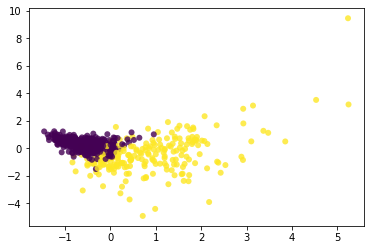

In [14]:
plt.scatter(x_factor[:,0],x_factor[:,1],c=y,alpha=.8,edgecolors='none')